EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd



In [2]:
# Load the Excel file
file_path = 'online_retail_II.xlsx'
xls = pd.ExcelFile(file_path)



df_2009_2010 = pd.read_excel(xls, sheet_name='Year 2009-2010')
df_2010_2011 = pd.read_excel(xls, sheet_name='Year 2010-2011')

# Optionally, you can concatenate both DataFrames if needed
combined_df = pd.concat([df_2009_2010, df_2010_2011])

# Display the first few rows of the combined DataFrame
print(combined_df.head())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [3]:
df_2009_2010.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [4]:
df_2010_2011.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
combined_df.head(4)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom


In [15]:


# Check for missing values in each column of the combined DataFrame
print(combined_df.isnull().sum())



Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
order_date          0
order_time          0
dtype: int64


In [16]:
combined_df= combined_df.dropna(subset=['Customer ID'])

In [17]:
combined_df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
order_date     0
order_time     0
dtype: int64

In [20]:
combined_df.duplicated().sum()


0

In [18]:
combined_df = combined_df.drop_duplicates() 

In [19]:
combined_df.duplicated().sum()

0

In [ ]:
from datetime import datetime 
from datetime import timedelta 
convert_dict = {'InvoiceDate': str} 
combined_df= combined_df.astype(convert_dict) 
print(combined_df.dtypes)

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object


In [21]:
combined_df['InvoiceDate'] = pd.to_datetime(combined_df['InvoiceDate'])


In [22]:
combined_df['order_date'] = [d.date() for d in combined_df['InvoiceDate']]


In [23]:
combined_df['order_time'] = [d.time() for d in combined_df['InvoiceDate']]


In [24]:
combined_df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,order_date,order_time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00


In [25]:
combined_df.head(4)



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,order_date,order_time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,07:45:00


In [27]:
import datetime  # Ensure this line is at the top of your script

# Convert string to datetime object
date = datetime.datetime.strptime('2018-11-10 10:55:31', '%Y-%m-%d %H:%M:%S')


In [28]:
 combined_df.describe()

,Quantity,InvoiceDate,Price,Customer ID,order_date
count,797885.000000,797885,797885.000000,797885.000000,797885
mean,12.602980,2011-01-02 13:17:34.141160704,3.702732,15313.062777,2011-01-01 23:59:27.189256448
min,-80995.000000,2009-12-01 07:45:00,0.000000,12346.000000,2009-12-01 00:00:00
25%,2.000000,2010-07-02 09:47:00,1.250000,13964.000000,2010-07-02 00:00:00
50%,5.000000,2010-12-02 12:33:00,1.950000,15228.000000,2010-12-02 00:00:00
75%,12.000000,2011-07-31 15:50:00,3.750000,16788.000000,2011-07-31 00:00:00
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,2011-12-09 00:00:00
std,191.670371,NaN,71.392549,1696.466663,NaN


In [31]:
combined_df=combined_df[(combined_df['Quantity']>0) & (combined_df['Price']>0)] 
combined_df.describe()
# The Quantity column has values greater than 0. This typically means you are excluding records where the quantity is zero or negative, which might indicate returns, errors, or non-sales transactions.
# The Price column has values greater than 0. This excludes records where the price is zero or negative, which could also indicate errors or special cases like giveaways.


,Quantity,InvoiceDate,Price,Customer ID,order_date
count,779425.000000,779425,779425.000000,779425.000000,779425
mean,13.489370,2011-01-03 01:44:42.593475584,3.218488,15320.360461,2011-01-02 12:27:07.679892224
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,2009-12-01 00:00:00
25%,2.000000,2010-07-02 14:39:00,1.250000,13971.000000,2010-07-02 00:00:00
50%,6.000000,2010-12-02 14:09:00,1.950000,15247.000000,2010-12-02 00:00:00
75%,12.000000,2011-08-01 13:44:00,3.750000,16794.000000,2011-08-01 00:00:00
max,80995.000000,2011-12-09 12:50:00,10953.500000,18287.000000,2011-12-09 00:00:00
std,145.855814,NaN,29.676140,1695.692775,NaN


IDENTIFYING OUTLIERS

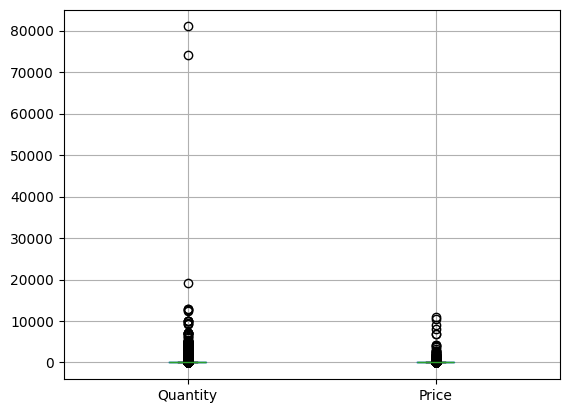

In [32]:
import matplotlib.pyplot as plt
combined_df.boxplot(column=['Quantity', 'Price'])
plt.show()


In [34]:
# Select only numeric columns from the DataFrame
numeric_cols = combined_df.select_dtypes(include=['number'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = numeric_cols[(numeric_cols < lower_bound) | (numeric_cols > upper_bound)]

# Display the outliers
outliers = outliers.dropna(how='all')  # Drop rows where all columns are NaN
print(outliers)


        Quantity  Price  Customer ID
3           48.0    NaN          NaN
22           NaN   8.50          NaN
35           NaN   9.95          NaN
38           NaN   8.95          NaN
54          28.0    NaN          NaN
...          ...    ...          ...
541866      36.0    NaN          NaN
541867      72.0    NaN          NaN
541868      48.0    NaN          NaN
541892       NaN   8.95          NaN
541909       NaN  18.00          NaN

[116052 rows x 3 columns]


In [35]:
combined_df_capped = combined_df.copy()
for col in numeric_cols.columns:
    combined_df_capped[col] = combined_df_capped[col].clip(lower_bound[col], upper_bound[col])


In [37]:
combined_df_capped.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,order_date,order_time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,07:45:00


In [39]:
combined_df_capped.describe()
# Yes, this is okay, if your goal was to reduce the impact of extreme outliers in the Quantity and Price columns. The results show that the capping process worked as intended, leading to more moderate statistics in both columns. This will generally lead to more robust statistical analyses that aren't overly influenced by extreme values.

,Quantity,InvoiceDate,Price,Customer ID,order_date
count,779425.000000,779425,779425.000000,779425.000000,779425
mean,8.285808,2011-01-03 01:44:42.593475584,2.654312,15320.360461,2011-01-02 12:27:07.679892224
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,2009-12-01 00:00:00
25%,2.000000,2010-07-02 14:39:00,1.250000,13971.000000,2010-07-02 00:00:00
50%,6.000000,2010-12-02 14:09:00,1.950000,15247.000000,2010-12-02 00:00:00
75%,12.000000,2011-08-01 13:44:00,3.750000,16794.000000,2011-08-01 00:00:00
max,27.000000,2011-12-09 12:50:00,7.500000,18287.000000,2011-12-09 00:00:00
std,8.083299,NaN,2.120267,1695.692775,NaN


 The RFM values can be grouped in several ways. We are going to implement percentile-based grouping.